# Extension: Quality of the predicted distances in higher dimensions with stage 2 copies

In this notebook, we show results corresponding to the Two-stage Distance Copying Extension, described in Appendix D of the thesis report. Specifically, we consider the stage 2 models trained during the extension experiment on the UCI high-dimensional datasets and measure the errors of the distances they predict for the points of both real and synthetic test datasets, comparing these predictions to ground truth values generated with Algorithm 1. Results are shown for every black box - copy (SNN, MNN, and LNN, appearing in this order for each black box) combination and summarized through averaged tables and scatter plots that describe the relationship between the real and predicted distances.

As a remark, this particular notebook and its plots correspond to the execution with seed 42. Nevertheless, the computations shown in the tables have been averaged across five different seeds (41, 42, 43, 44, and 45), aiming to increase the reliability and significance of the obtained results.

In [1]:
# All necessary imports
import numpy as np
import os
import types
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from time import perf_counter
from sklearn.model_selection import train_test_split
from sklearn.ensemble import HistGradientBoostingClassifier, HistGradientBoostingRegressor
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
import matplotlib.colors as mcolors
import pickle
import random
from tensorflow.keras.models import save_model, load_model
from tensorflow.keras import Model as KerasModel
from scipy.interpolate import interp1d
from ucimlrepo import fetch_ucirepo
from scipy.stats import qmc
from sklearn.metrics import mean_absolute_error, mean_squared_error

original_cwd = os.getcwd()
os.chdir('../utils')
from utils import *
os.chdir(original_cwd)

In [2]:
# Set the seed
seed = 42
random.seed(seed)
np.random.seed(seed)
os.environ['PYTHONHASHSEED'] = str(seed)
tf.random.set_seed(seed)
tf.keras.utils.set_random_seed(seed)
tf.config.experimental.enable_op_determinism()

# Create a wrapper for our Neural network black boxes
def bbmodelW(x):
    if isinstance(bbmodel, tf.keras.models.Model):
        return np.where(bbmodel(x) > 0.5, 1, -1).flatten()
    return np.where(bbmodel.predict(x) > 0.5, 1, -1).flatten()

## Breast cancer dataset

In [3]:
# Import dataset
breast_cancer_wisconsin_diagnostic = fetch_ucirepo(id=17) 
  
X = breast_cancer_wisconsin_diagnostic.data.features.values
X = normalize(X)
y = np.where(breast_cancer_wisconsin_diagnostic.data.targets.values.flatten() == 'M', 1.,0.)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed)

X_test = X_test[:200]
Syn_test = np.random.uniform(-1,1, (100, 30))

### Black box 1: Random Forest classifier


--- Final Distance Prediction Evaluation ---
Model Stage: 2
Mean MAE : 0.2582 ± 0.0212
Mean RMSE: 0.3318 ± 0.0296


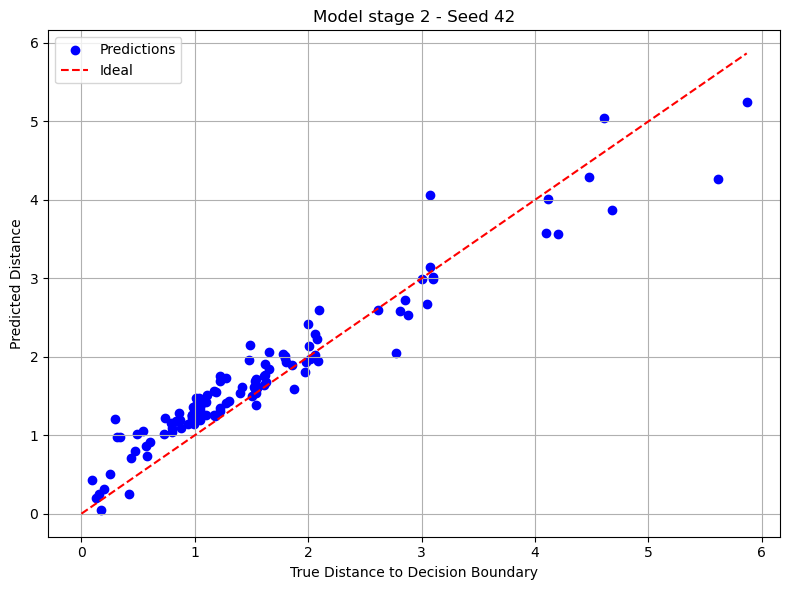

In [4]:
evaluate_distance_prediction(folder_path="../results", file_prefix="extension_results_DS4_1_1_seed", synthetic_data=X_test, 
                             model_stage=2, num_rdc_samples=10_000, seed_plot_index=42)


--- Final Distance Prediction Evaluation ---
Model Stage: 2
Mean MAE : 0.2784 ± 0.0183
Mean RMSE: 0.3509 ± 0.0186


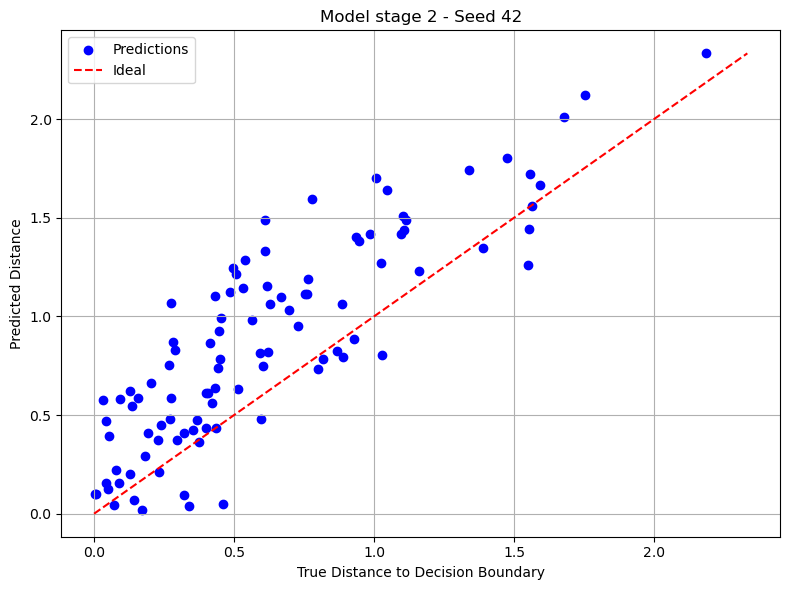

In [5]:
evaluate_distance_prediction(folder_path="../results", file_prefix="extension_results_DS4_1_1_seed", synthetic_data=Syn_test, 
                             model_stage=2, num_rdc_samples=10_000, seed_plot_index=42)


--- Final Distance Prediction Evaluation ---
Model Stage: 2
Mean MAE : 0.2259 ± 0.0335
Mean RMSE: 0.2925 ± 0.0588


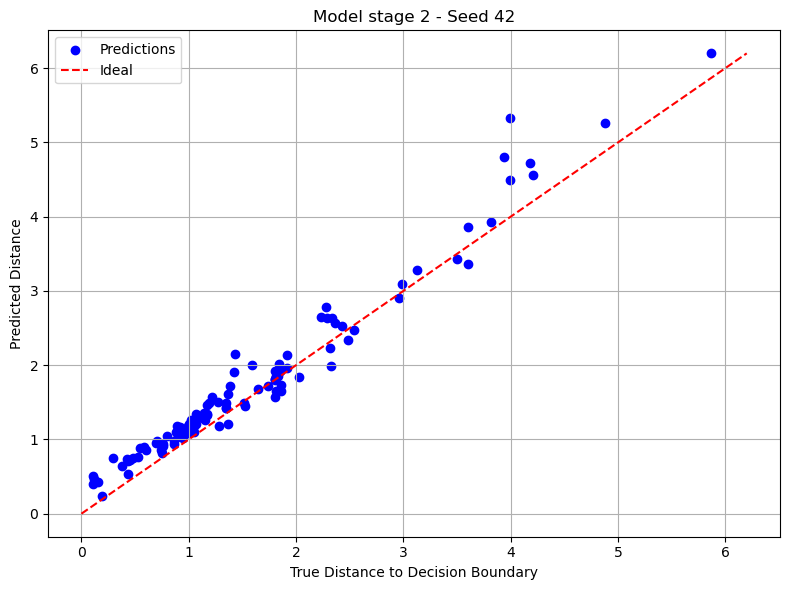

In [6]:
evaluate_distance_prediction(folder_path="../results", file_prefix="extension_results_DS4_1_2_seed", synthetic_data=X_test, 
                             model_stage=2, num_rdc_samples=10_000, seed_plot_index=42)


--- Final Distance Prediction Evaluation ---
Model Stage: 2
Mean MAE : 0.2935 ± 0.0349
Mean RMSE: 0.3506 ± 0.0313


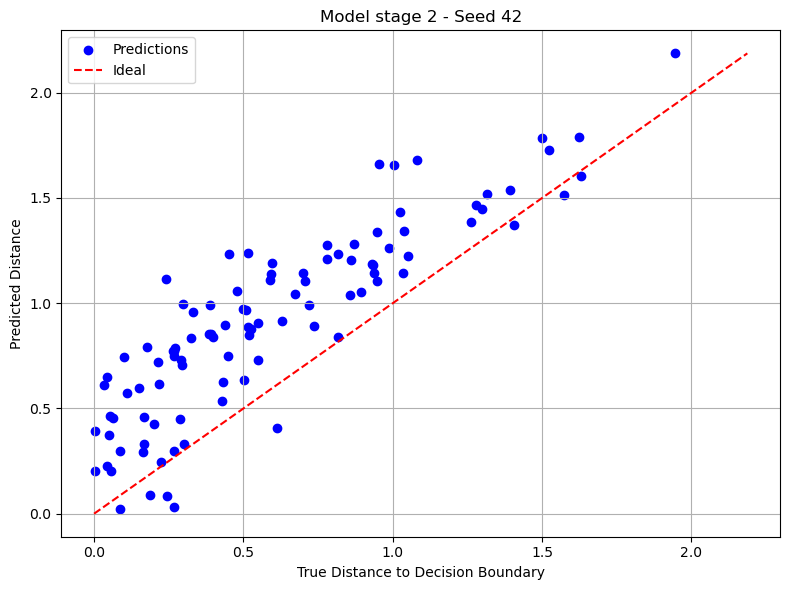

In [7]:
evaluate_distance_prediction(folder_path="../results", file_prefix="extension_results_DS4_1_2_seed", synthetic_data=Syn_test, 
                             model_stage=2, num_rdc_samples=10_000, seed_plot_index=42)


--- Final Distance Prediction Evaluation ---
Model Stage: 2
Mean MAE : 0.2487 ± 0.0296
Mean RMSE: 0.3088 ± 0.0303


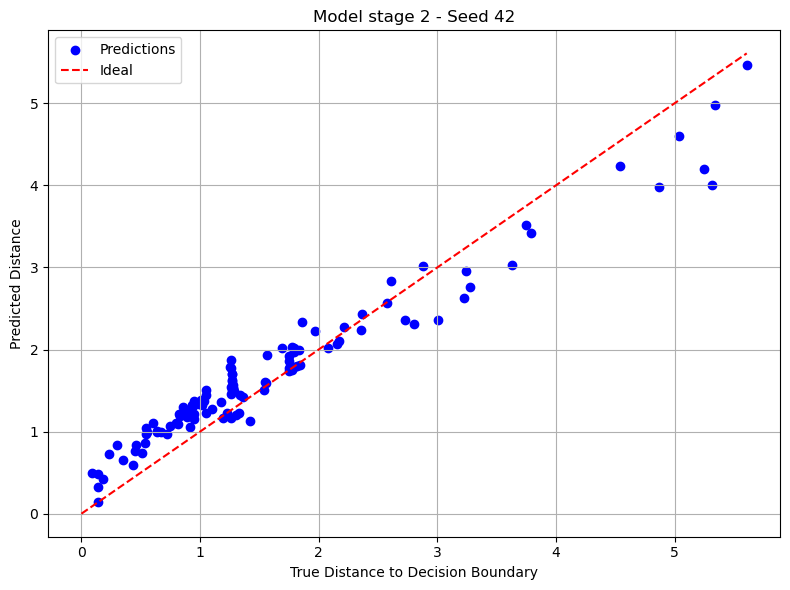

In [8]:
evaluate_distance_prediction(folder_path="../results", file_prefix="extension_results_DS4_1_3_seed", synthetic_data=X_test, 
                             model_stage=2, num_rdc_samples=10_000, seed_plot_index=42)


--- Final Distance Prediction Evaluation ---
Model Stage: 2
Mean MAE : 0.2875 ± 0.0422
Mean RMSE: 0.3426 ± 0.0366


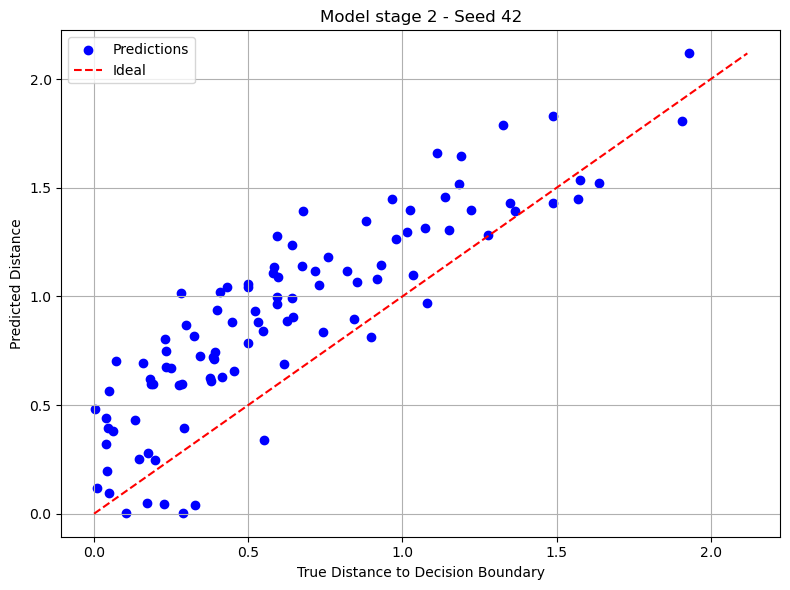

In [9]:
evaluate_distance_prediction(folder_path="../results", file_prefix="extension_results_DS4_1_3_seed", synthetic_data=Syn_test, 
                             model_stage=2, num_rdc_samples=10_000, seed_plot_index=42)

### Black box 2: Gradient Boosting classifier


--- Final Distance Prediction Evaluation ---
Model Stage: 2
Mean MAE : 0.2867 ± 0.0618
Mean RMSE: 0.3366 ± 0.0657


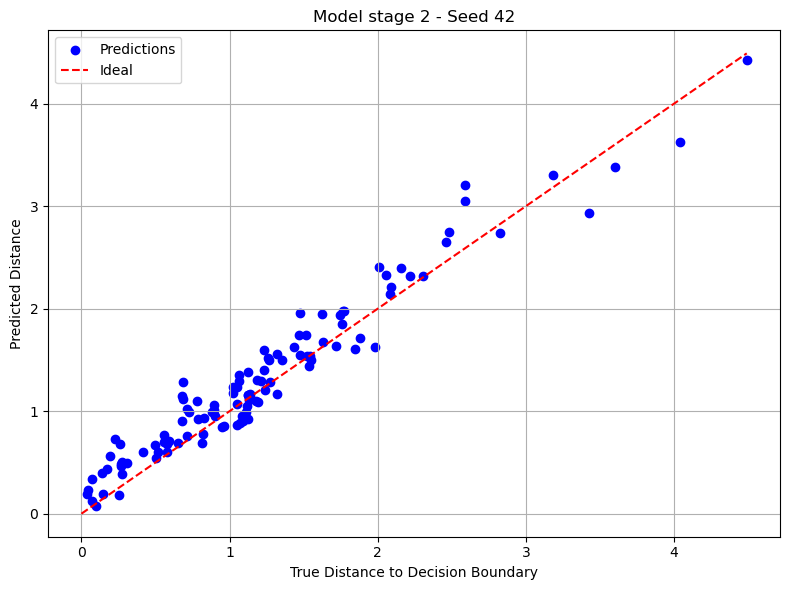

In [10]:
evaluate_distance_prediction(folder_path="../results", file_prefix="extension_results_DS4_2_1_seed", synthetic_data=X_test, 
                             model_stage=2, num_rdc_samples=10_000, seed_plot_index=42)


--- Final Distance Prediction Evaluation ---
Model Stage: 2
Mean MAE : 0.2641 ± 0.0268
Mean RMSE: 0.3328 ± 0.0308


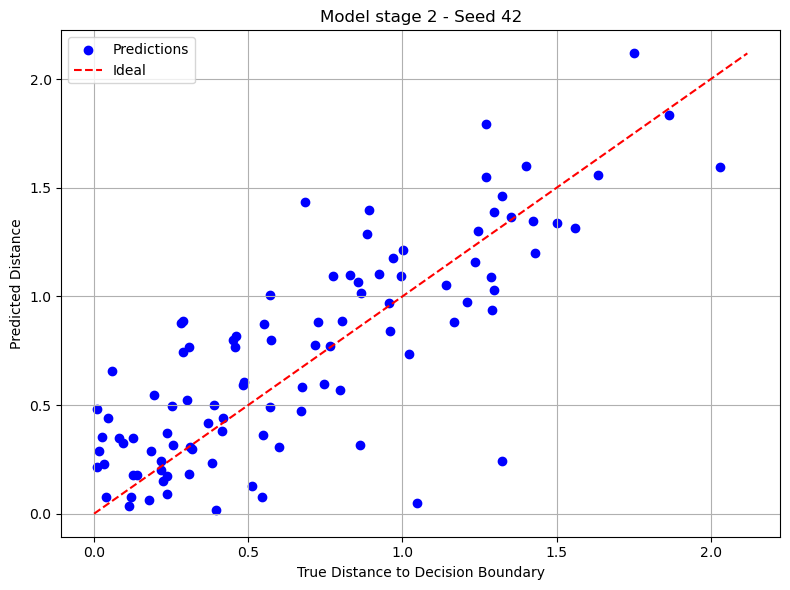

In [11]:
evaluate_distance_prediction(folder_path="../results", file_prefix="extension_results_DS4_2_1_seed", synthetic_data=Syn_test, 
                             model_stage=2, num_rdc_samples=10_000, seed_plot_index=42)


--- Final Distance Prediction Evaluation ---
Model Stage: 2
Mean MAE : 0.2296 ± 0.0533
Mean RMSE: 0.2870 ± 0.0618


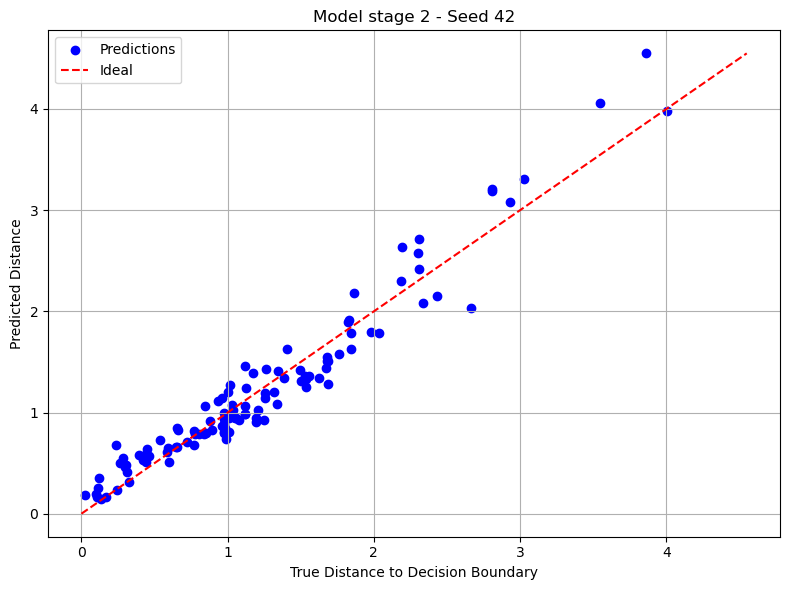

In [12]:
evaluate_distance_prediction(folder_path="../results", file_prefix="extension_results_DS4_2_2_seed", synthetic_data=X_test, 
                             model_stage=2, num_rdc_samples=10_000, seed_plot_index=42)


--- Final Distance Prediction Evaluation ---
Model Stage: 2
Mean MAE : 0.2962 ± 0.0309
Mean RMSE: 0.3562 ± 0.0282


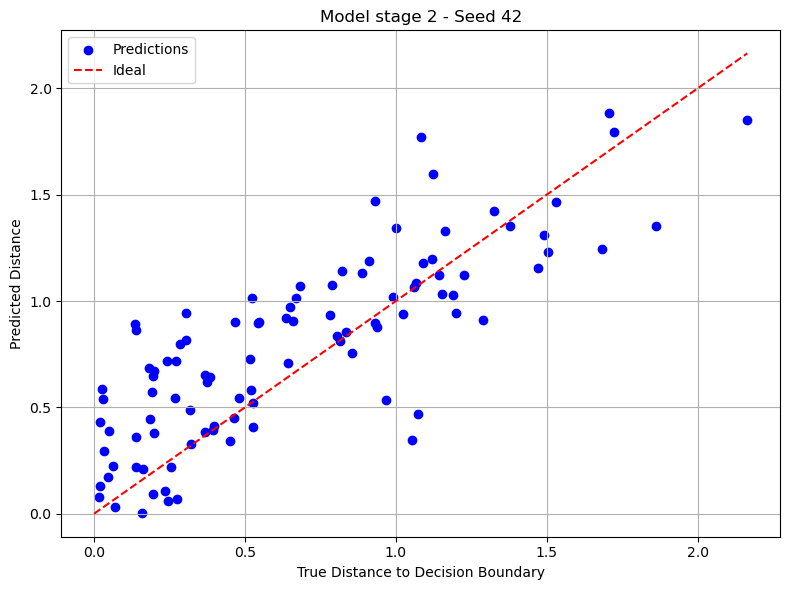

In [13]:
evaluate_distance_prediction(folder_path="../results", file_prefix="extension_results_DS4_2_2_seed", synthetic_data=Syn_test, 
                             model_stage=2, num_rdc_samples=10_000, seed_plot_index=42)


--- Final Distance Prediction Evaluation ---
Model Stage: 2
Mean MAE : 0.2268 ± 0.0278
Mean RMSE: 0.2930 ± 0.0472


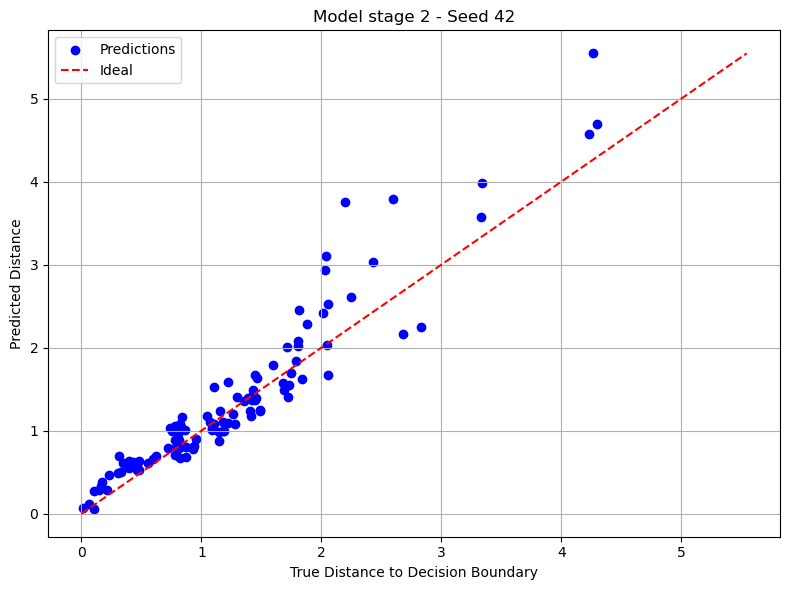

In [14]:
evaluate_distance_prediction(folder_path="../results", file_prefix="extension_results_DS4_2_3_seed", synthetic_data=X_test, 
                             model_stage=2, num_rdc_samples=10_000, seed_plot_index=42)


--- Final Distance Prediction Evaluation ---
Model Stage: 2
Mean MAE : 0.2840 ± 0.0116
Mean RMSE: 0.3480 ± 0.0125


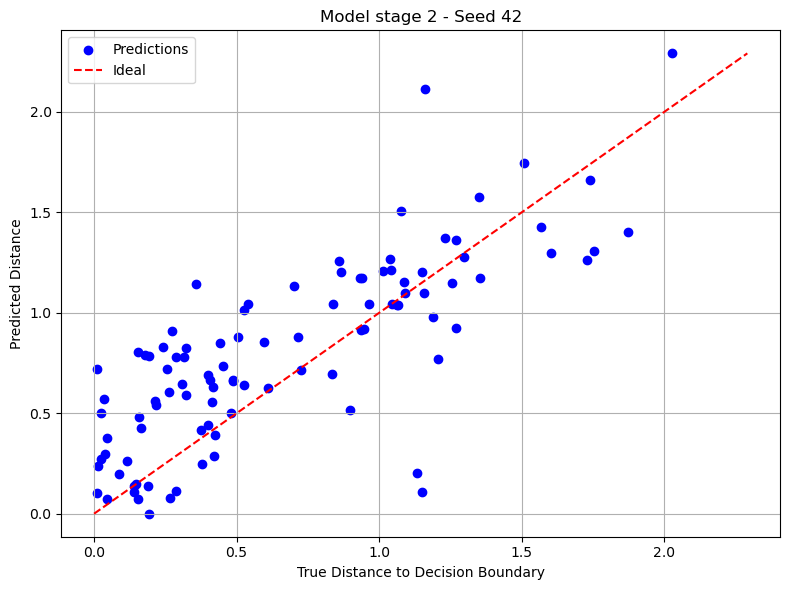

In [15]:
evaluate_distance_prediction(folder_path="../results", file_prefix="extension_results_DS4_2_3_seed", synthetic_data=Syn_test, 
                             model_stage=2, num_rdc_samples=10_000, seed_plot_index=42)

### Black box 3: Neural Network classifier


--- Final Distance Prediction Evaluation ---
Model Stage: 2
Mean MAE : 0.2597 ± 0.0486
Mean RMSE: 0.3256 ± 0.0782


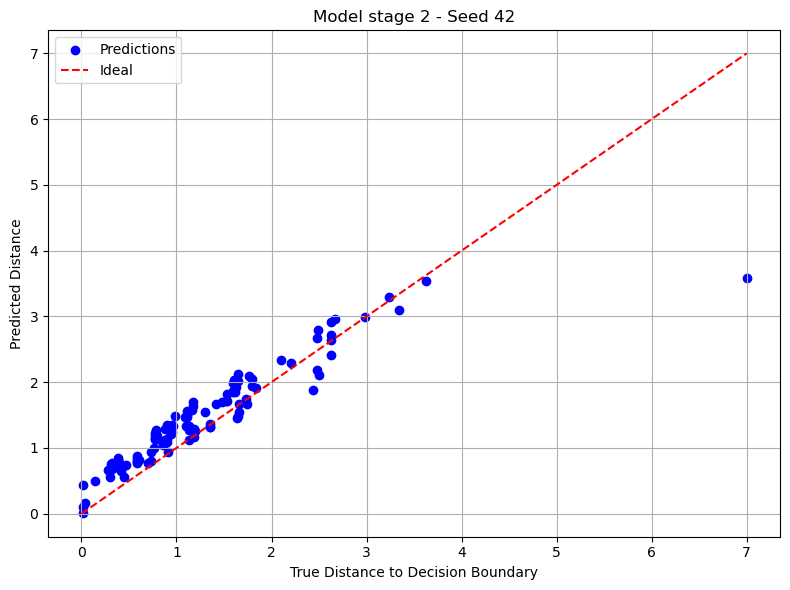

In [16]:
evaluate_distance_prediction(folder_path="../results", file_prefix="extension_results_DS4_3_1_seed", synthetic_data=X_test, 
                             model_stage=2, num_rdc_samples=10_000, seed_plot_index=42)


--- Final Distance Prediction Evaluation ---
Model Stage: 2
Mean MAE : 0.2876 ± 0.0557
Mean RMSE: 0.3809 ± 0.1082


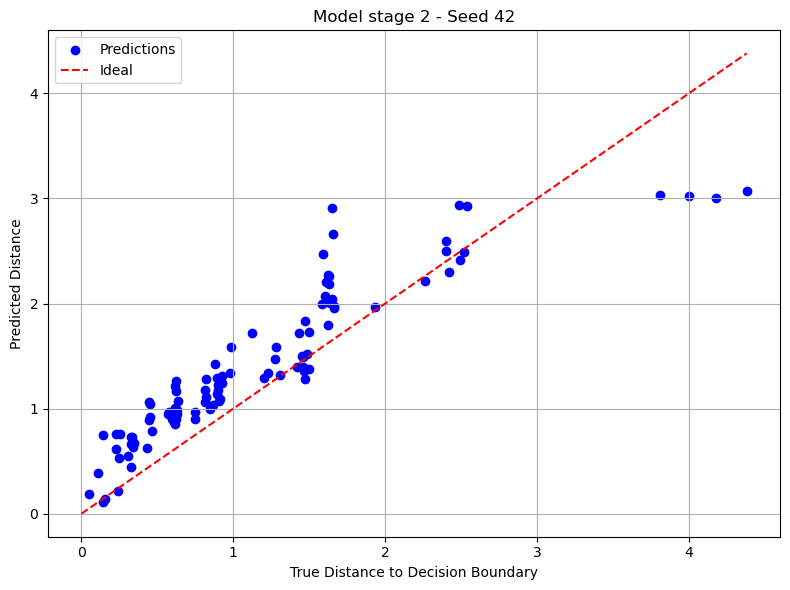

In [17]:
evaluate_distance_prediction(folder_path="../results", file_prefix="extension_results_DS4_3_1_seed", synthetic_data=Syn_test, 
                             model_stage=2, num_rdc_samples=10_000, seed_plot_index=42)


--- Final Distance Prediction Evaluation ---
Model Stage: 2
Mean MAE : 0.2258 ± 0.0211
Mean RMSE: 0.2624 ± 0.0202


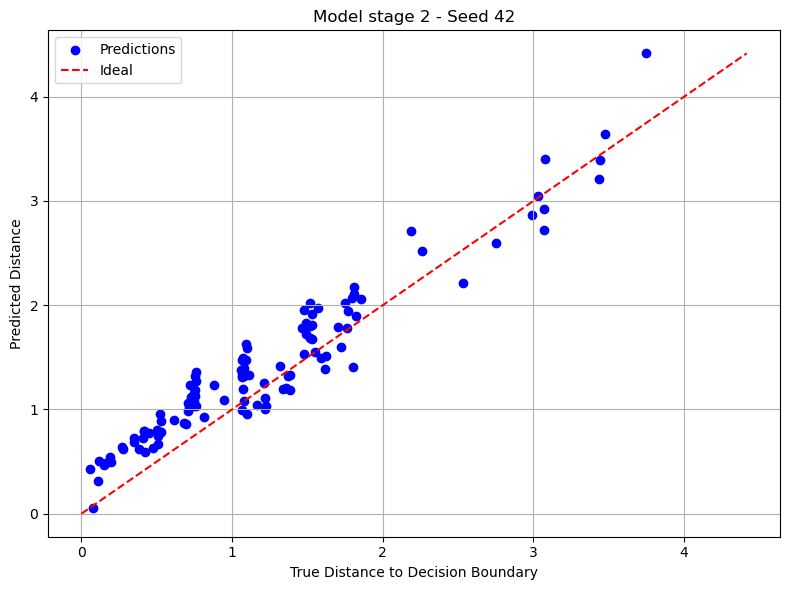

In [18]:
evaluate_distance_prediction(folder_path="../results", file_prefix="extension_results_DS4_3_2_seed", synthetic_data=X_test, 
                             model_stage=2, num_rdc_samples=10_000, seed_plot_index=42)


--- Final Distance Prediction Evaluation ---
Model Stage: 2
Mean MAE : 0.2568 ± 0.0227
Mean RMSE: 0.3556 ± 0.0605


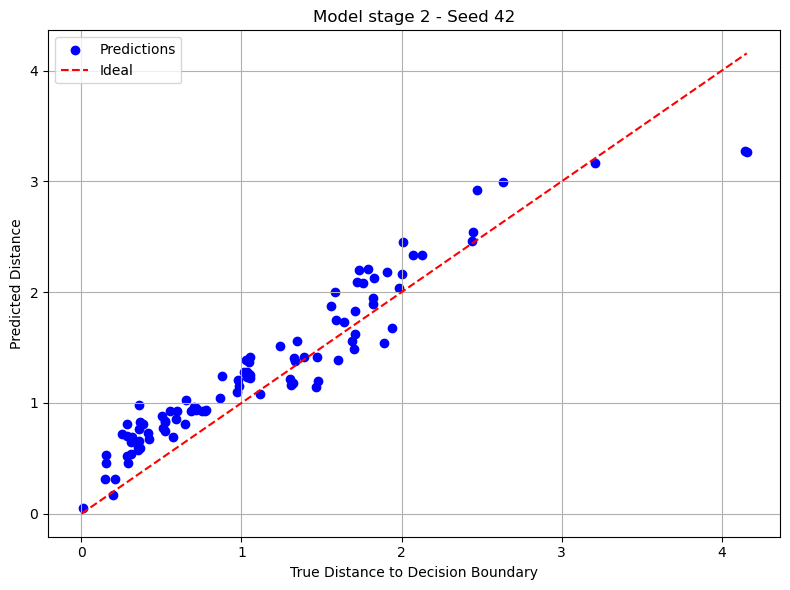

In [19]:
evaluate_distance_prediction(folder_path="../results", file_prefix="extension_results_DS4_3_2_seed", synthetic_data=Syn_test, 
                             model_stage=2, num_rdc_samples=10_000, seed_plot_index=42)


--- Final Distance Prediction Evaluation ---
Model Stage: 2
Mean MAE : 0.2581 ± 0.0256
Mean RMSE: 0.3089 ± 0.0392


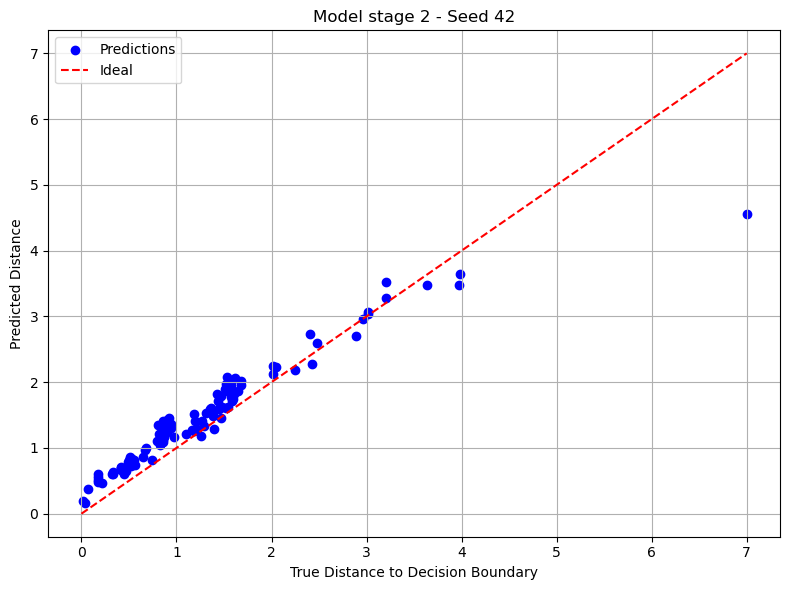

In [20]:
evaluate_distance_prediction(folder_path="../results", file_prefix="extension_results_DS4_3_3_seed", synthetic_data=X_test, 
                             model_stage=2, num_rdc_samples=10_000, seed_plot_index=42)


--- Final Distance Prediction Evaluation ---
Model Stage: 2
Mean MAE : 0.2726 ± 0.0145
Mean RMSE: 0.3726 ± 0.0595


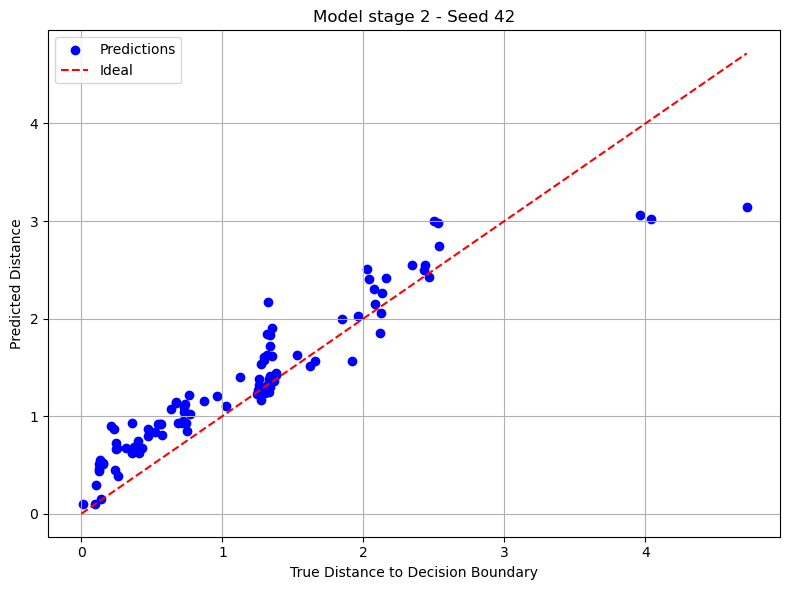

In [21]:
evaluate_distance_prediction(folder_path="../results", file_prefix="extension_results_DS4_3_3_seed", synthetic_data=Syn_test, 
                             model_stage=2, num_rdc_samples=10_000, seed_plot_index=42)

## Rice dataset

In [22]:
# Import dataset
rice_cammeo_and_osmancik = fetch_ucirepo(id=545) 
  
X = rice_cammeo_and_osmancik.data.features.values
X = normalize(X)
y = np.where(rice_cammeo_and_osmancik.data.targets.values.flatten() == 'Cammeo', 1.,0.)  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed)

X_test = X_test[:200]
Syn_test = np.random.uniform(-1,1, (100, 7))

### Black box 1: Random Forest classifier


--- Final Distance Prediction Evaluation ---
Model Stage: 2
Mean MAE : 0.1358 ± 0.0264
Mean RMSE: 0.1579 ± 0.0263


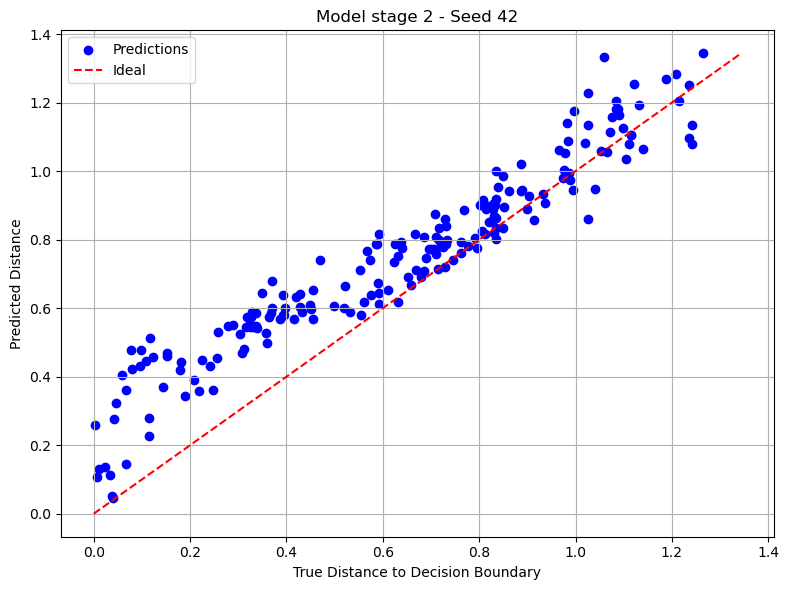

In [23]:
evaluate_distance_prediction(folder_path="../results", file_prefix="extension_results_DS5_1_1_seed", synthetic_data=X_test, 
                             model_stage=2, num_rdc_samples=10_000, seed_plot_index=42)


--- Final Distance Prediction Evaluation ---
Model Stage: 2
Mean MAE : 0.1672 ± 0.0195
Mean RMSE: 0.1953 ± 0.0214


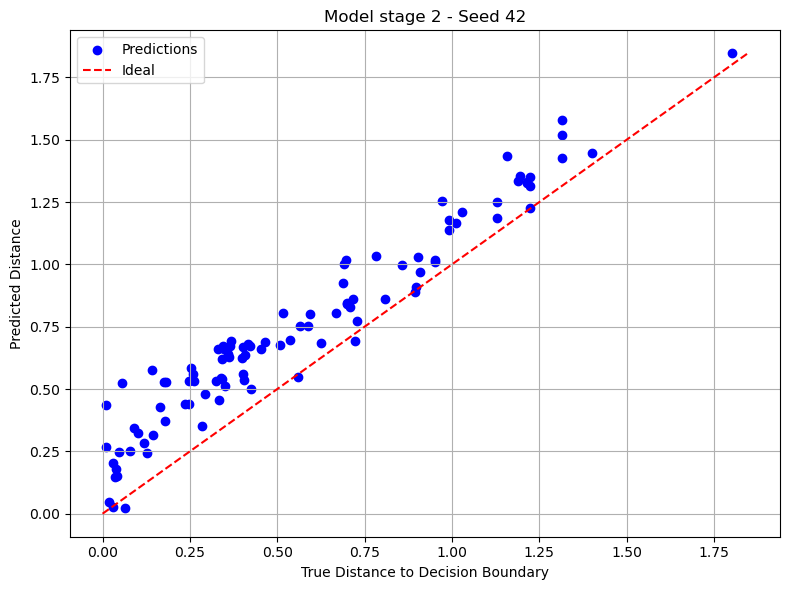

In [24]:
evaluate_distance_prediction(folder_path="../results", file_prefix="extension_results_DS5_1_1_seed", synthetic_data=Syn_test, 
                             model_stage=2, num_rdc_samples=10_000, seed_plot_index=42)


--- Final Distance Prediction Evaluation ---
Model Stage: 2
Mean MAE : 0.1424 ± 0.0250
Mean RMSE: 0.1696 ± 0.0242


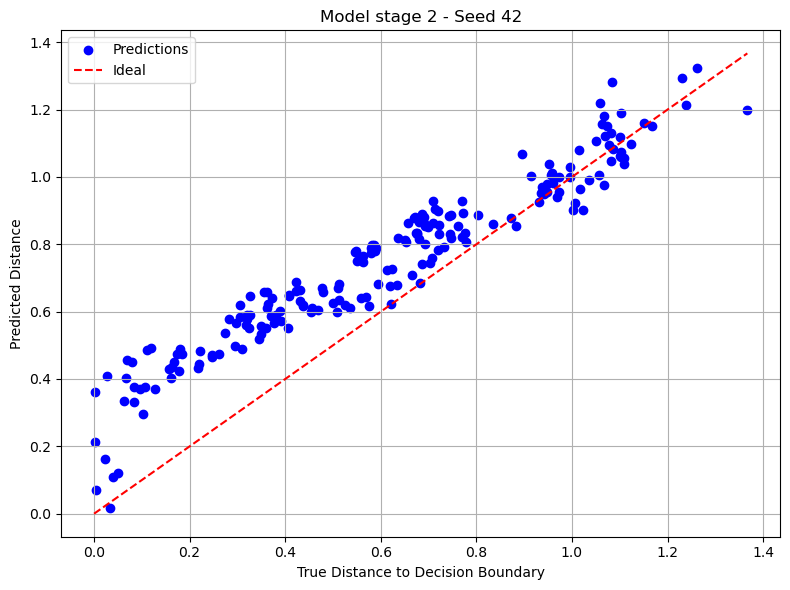

In [25]:
evaluate_distance_prediction(folder_path="../results", file_prefix="extension_results_DS5_1_2_seed", synthetic_data=X_test, 
                             model_stage=2, num_rdc_samples=10_000, seed_plot_index=42)


--- Final Distance Prediction Evaluation ---
Model Stage: 2
Mean MAE : 0.1521 ± 0.0283
Mean RMSE: 0.1774 ± 0.0272


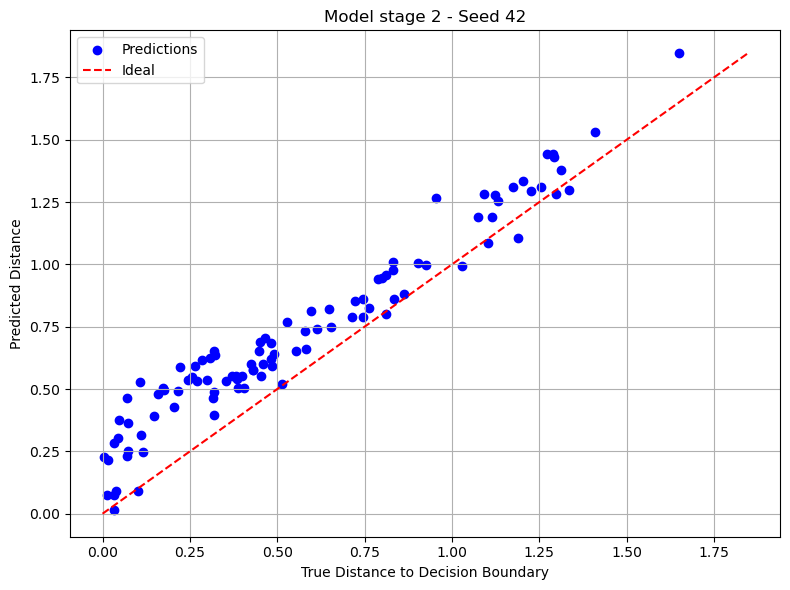

In [26]:
evaluate_distance_prediction(folder_path="../results", file_prefix="extension_results_DS5_1_2_seed", synthetic_data=Syn_test, 
                             model_stage=2, num_rdc_samples=10_000, seed_plot_index=42)


--- Final Distance Prediction Evaluation ---
Model Stage: 2
Mean MAE : 0.1453 ± 0.0316
Mean RMSE: 0.1692 ± 0.0323


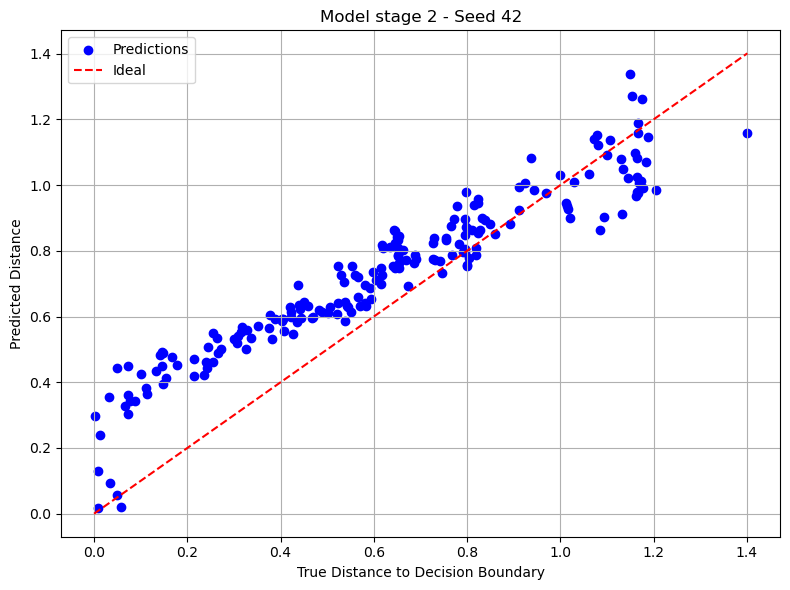

In [27]:
evaluate_distance_prediction(folder_path="../results", file_prefix="extension_results_DS5_1_3_seed", synthetic_data=X_test, 
                             model_stage=2, num_rdc_samples=10_000, seed_plot_index=42)


--- Final Distance Prediction Evaluation ---
Model Stage: 2
Mean MAE : 0.1487 ± 0.0143
Mean RMSE: 0.1767 ± 0.0154


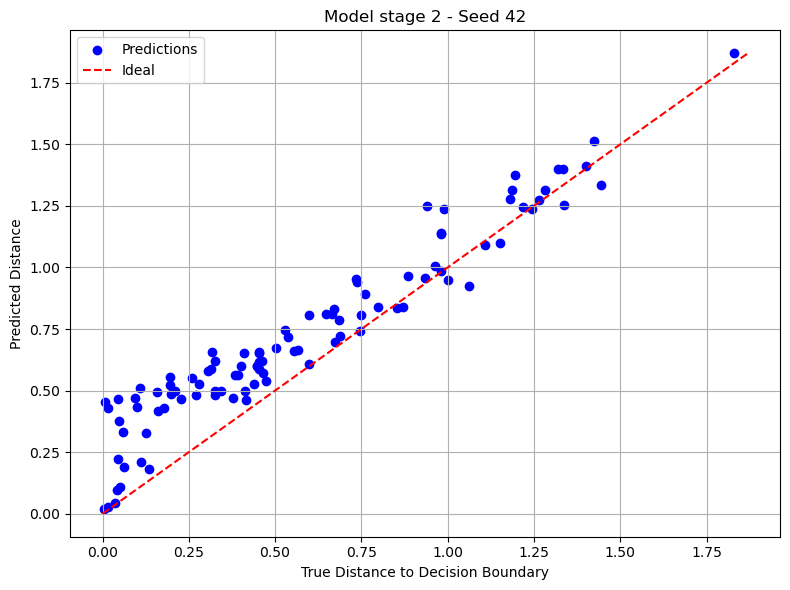

In [28]:
evaluate_distance_prediction(folder_path="../results", file_prefix="extension_results_DS5_1_3_seed", synthetic_data=Syn_test, 
                             model_stage=2, num_rdc_samples=10_000, seed_plot_index=42)

### Black box 2: Gradient Boosting classifier


--- Final Distance Prediction Evaluation ---
Model Stage: 2
Mean MAE : 0.1873 ± 0.0106
Mean RMSE: 0.2374 ± 0.0128


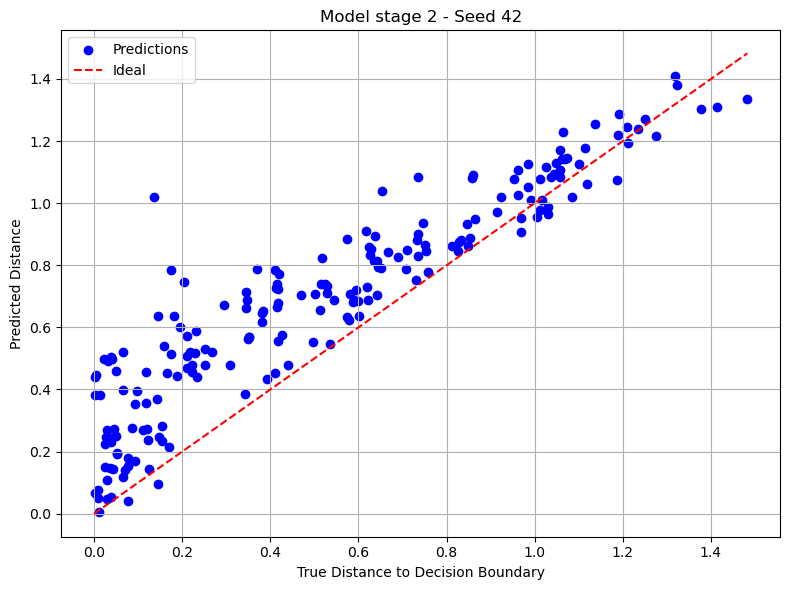

In [29]:
evaluate_distance_prediction(folder_path="../results", file_prefix="extension_results_DS5_2_1_seed", synthetic_data=X_test, 
                             model_stage=2, num_rdc_samples=10_000, seed_plot_index=42)


--- Final Distance Prediction Evaluation ---
Model Stage: 2
Mean MAE : 0.1529 ± 0.0096
Mean RMSE: 0.1848 ± 0.0083


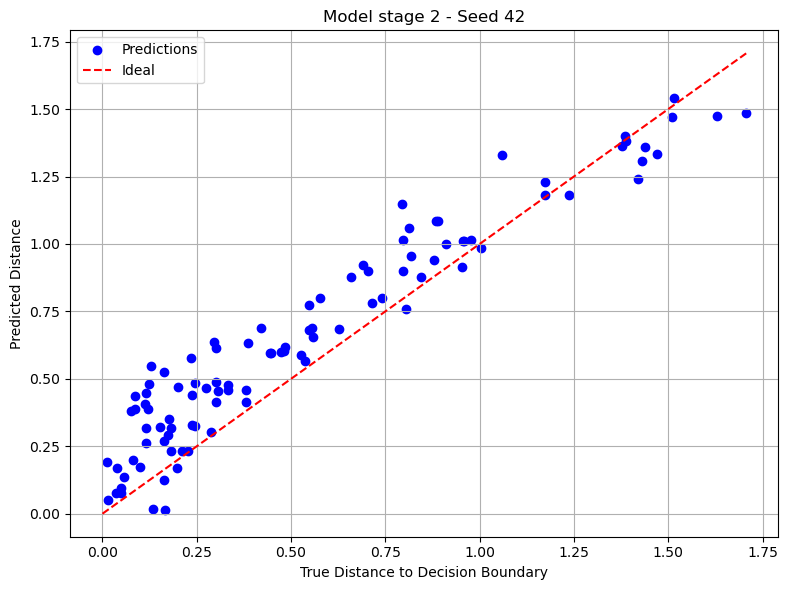

In [30]:
evaluate_distance_prediction(folder_path="../results", file_prefix="extension_results_DS5_2_1_seed", synthetic_data=Syn_test, 
                             model_stage=2, num_rdc_samples=10_000, seed_plot_index=42)


--- Final Distance Prediction Evaluation ---
Model Stage: 2
Mean MAE : 0.2058 ± 0.0066
Mean RMSE: 0.2496 ± 0.0054


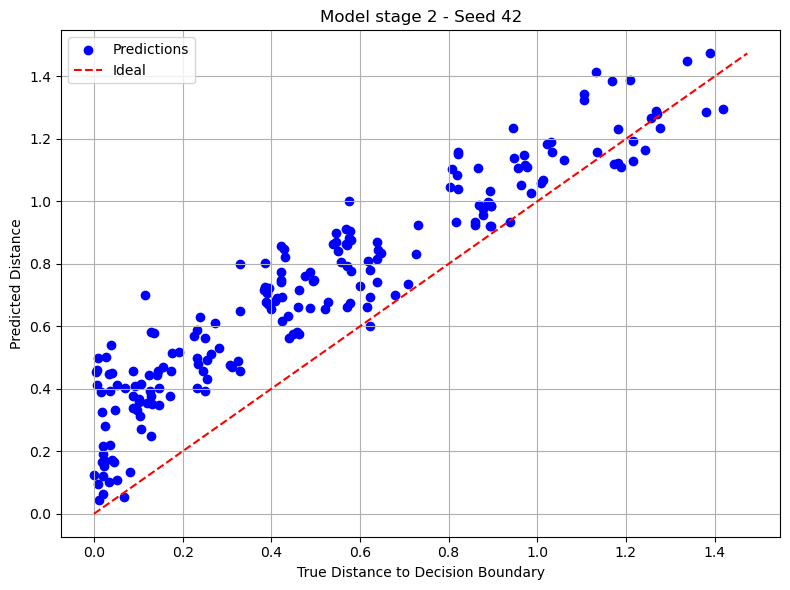

In [31]:
evaluate_distance_prediction(folder_path="../results", file_prefix="extension_results_DS5_2_2_seed", synthetic_data=X_test, 
                             model_stage=2, num_rdc_samples=10_000, seed_plot_index=42)


--- Final Distance Prediction Evaluation ---
Model Stage: 2
Mean MAE : 0.1458 ± 0.0090
Mean RMSE: 0.1731 ± 0.0094


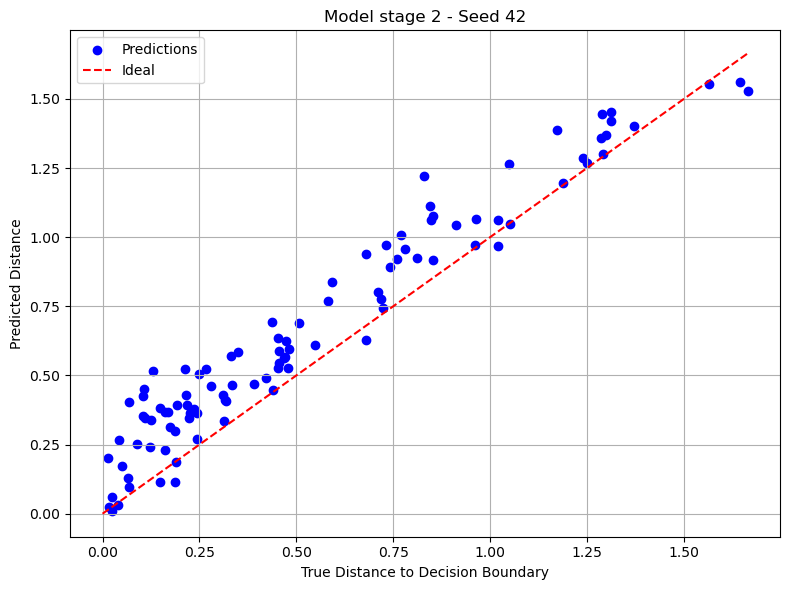

In [32]:
evaluate_distance_prediction(folder_path="../results", file_prefix="extension_results_DS5_2_2_seed", synthetic_data=Syn_test, 
                             model_stage=2, num_rdc_samples=10_000, seed_plot_index=42)


--- Final Distance Prediction Evaluation ---
Model Stage: 2
Mean MAE : 0.2020 ± 0.0234
Mean RMSE: 0.2479 ± 0.0235


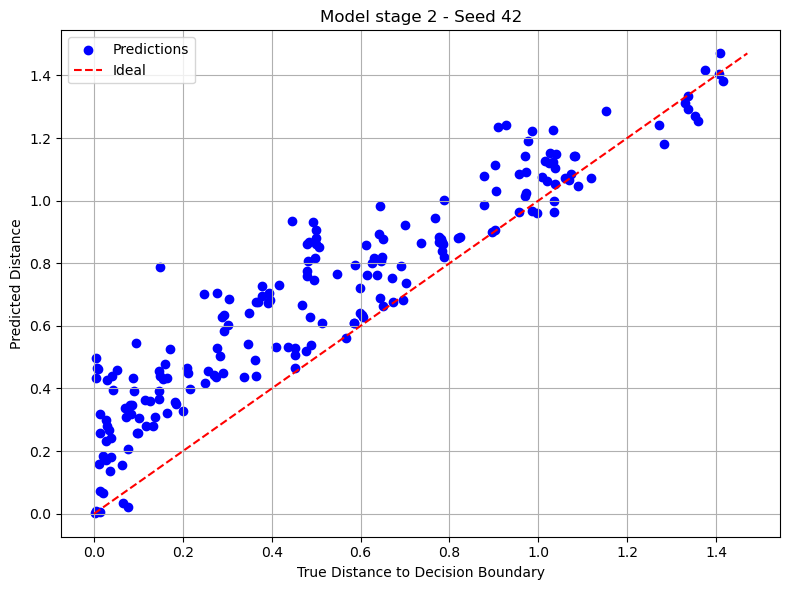

In [33]:
evaluate_distance_prediction(folder_path="../results", file_prefix="extension_results_DS5_2_3_seed", synthetic_data=X_test, 
                             model_stage=2, num_rdc_samples=10_000, seed_plot_index=42)


--- Final Distance Prediction Evaluation ---
Model Stage: 2
Mean MAE : 0.1436 ± 0.0117
Mean RMSE: 0.1724 ± 0.0102


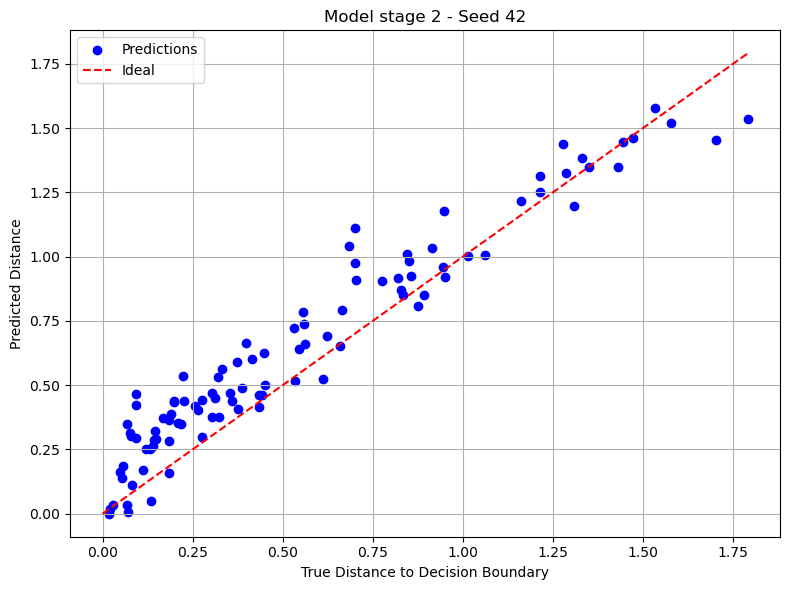

In [34]:
evaluate_distance_prediction(folder_path="../results", file_prefix="extension_results_DS5_2_3_seed", synthetic_data=Syn_test, 
                             model_stage=2, num_rdc_samples=10_000, seed_plot_index=42)

### Black box 3: Neural Network classifier


--- Final Distance Prediction Evaluation ---
Model Stage: 2
Mean MAE : 0.1485 ± 0.0206
Mean RMSE: 0.1667 ± 0.0198


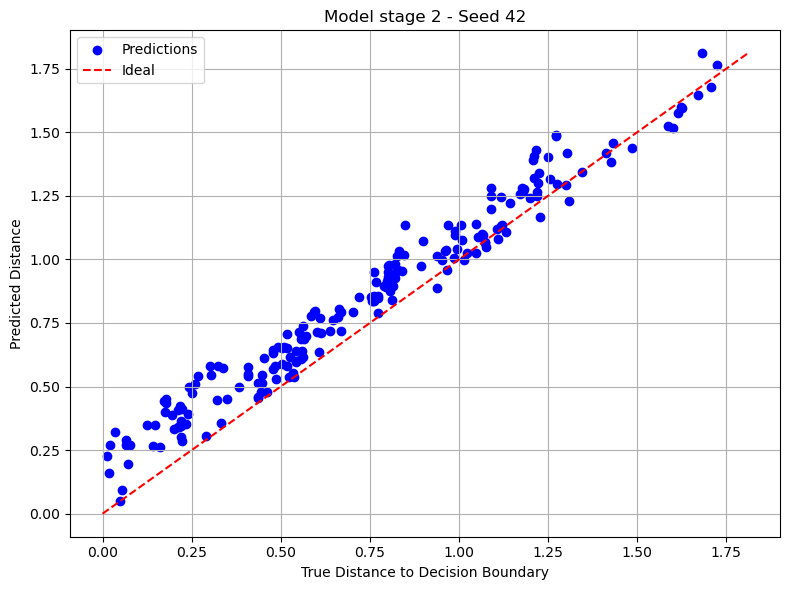

In [35]:
evaluate_distance_prediction(folder_path="../results", file_prefix="extension_results_DS5_3_1_seed", synthetic_data=X_test, 
                             model_stage=2, num_rdc_samples=10_000, seed_plot_index=42)


--- Final Distance Prediction Evaluation ---
Model Stage: 2
Mean MAE : 0.1471 ± 0.0215
Mean RMSE: 0.1654 ± 0.0218


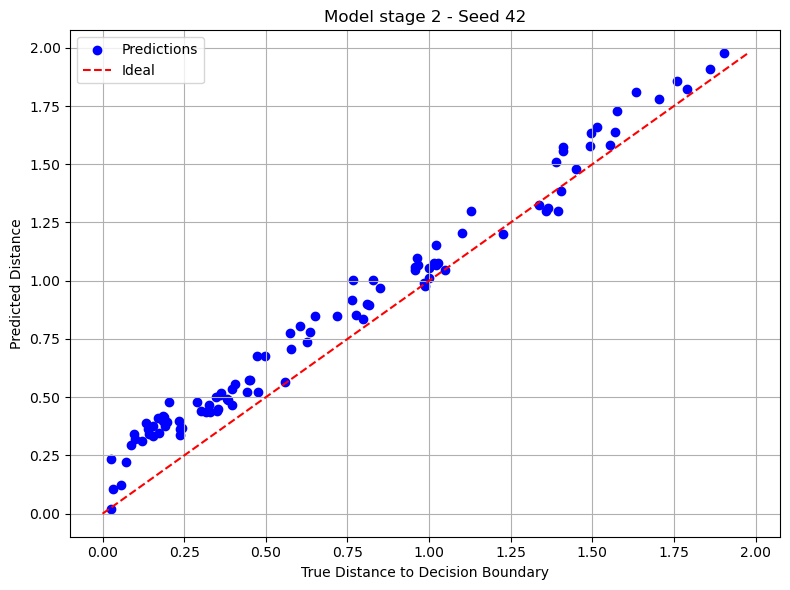

In [36]:
evaluate_distance_prediction(folder_path="../results", file_prefix="extension_results_DS5_3_1_seed", synthetic_data=Syn_test, 
                             model_stage=2, num_rdc_samples=10_000, seed_plot_index=42)


--- Final Distance Prediction Evaluation ---
Model Stage: 2
Mean MAE : 0.1635 ± 0.0172
Mean RMSE: 0.1807 ± 0.0152


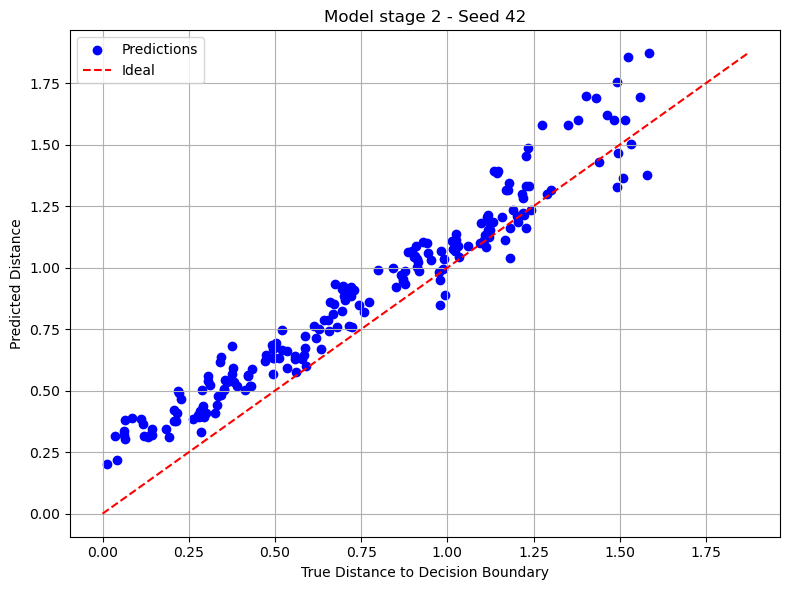

In [37]:
evaluate_distance_prediction(folder_path="../results", file_prefix="extension_results_DS5_3_2_seed", synthetic_data=X_test, 
                             model_stage=2, num_rdc_samples=10_000, seed_plot_index=42)


--- Final Distance Prediction Evaluation ---
Model Stage: 2
Mean MAE : 0.1419 ± 0.0305
Mean RMSE: 0.1588 ± 0.0316


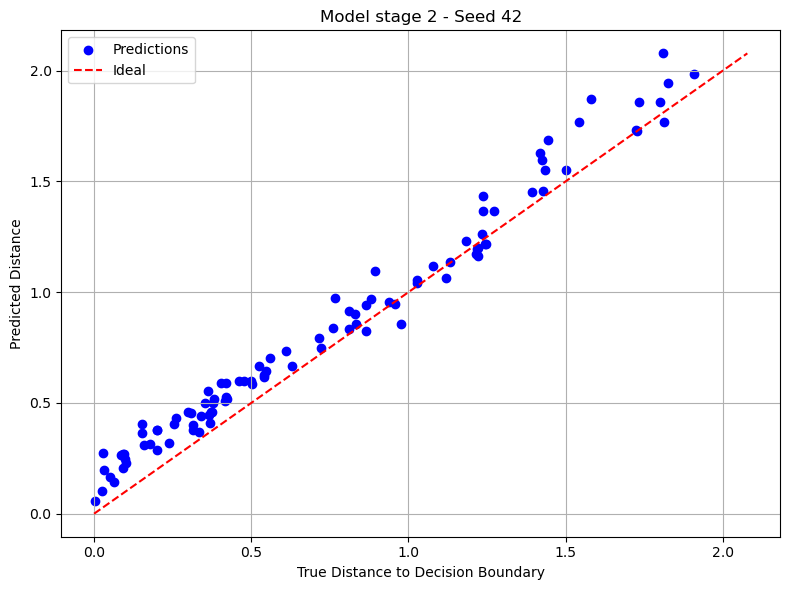

In [38]:
evaluate_distance_prediction(folder_path="../results", file_prefix="extension_results_DS5_3_2_seed", synthetic_data=Syn_test, 
                             model_stage=2, num_rdc_samples=10_000, seed_plot_index=42)


--- Final Distance Prediction Evaluation ---
Model Stage: 2
Mean MAE : 0.1660 ± 0.0289
Mean RMSE: 0.1854 ± 0.0304


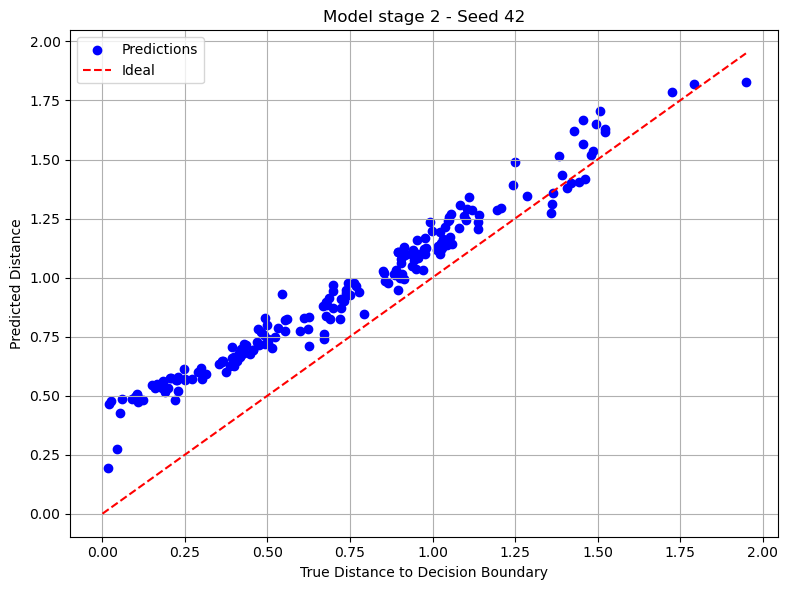

In [39]:
evaluate_distance_prediction(folder_path="../results", file_prefix="extension_results_DS5_3_3_seed", synthetic_data=X_test, 
                             model_stage=2, num_rdc_samples=10_000, seed_plot_index=42)


--- Final Distance Prediction Evaluation ---
Model Stage: 2
Mean MAE : 0.1519 ± 0.0245
Mean RMSE: 0.1699 ± 0.0254


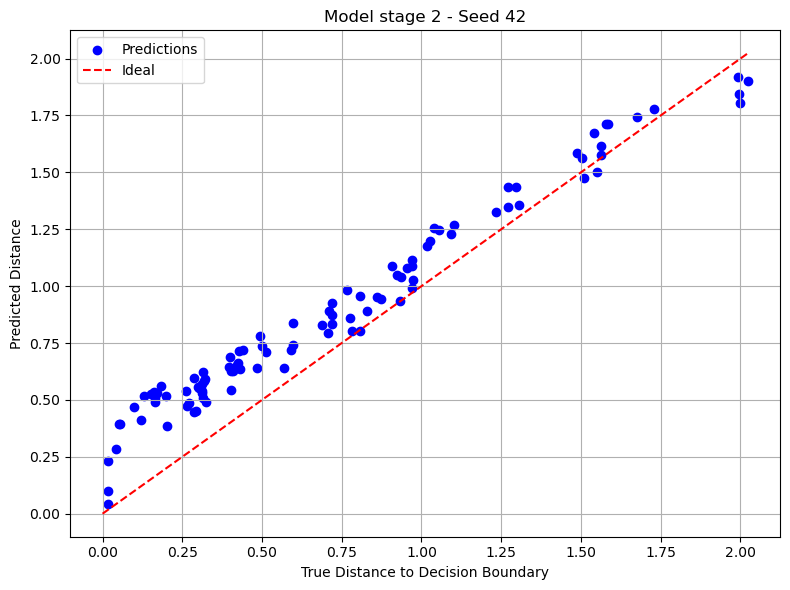

In [40]:
evaluate_distance_prediction(folder_path="../results", file_prefix="extension_results_DS5_3_3_seed", synthetic_data=Syn_test, 
                             model_stage=2, num_rdc_samples=10_000, seed_plot_index=42)

## Connectionist bench (mines vs rocks) dataset

In [41]:
# Import dataset
connectionist_bench_sonar_mines_vs_rocks = fetch_ucirepo(id=151) 

X = connectionist_bench_sonar_mines_vs_rocks.data.features.values 
X = normalize(X) 
y = np.where(connectionist_bench_sonar_mines_vs_rocks.data.targets.values.flatten() == 'M', 1.,0.)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed)

X_test = X_test[:200]
Syn_test = np.random.uniform(-1,1, (100, 60))

### Black box 1: Random Forest classifier


--- Final Distance Prediction Evaluation ---
Model Stage: 2
Mean MAE : 0.4076 ± 0.0239
Mean RMSE: 0.5323 ± 0.0441


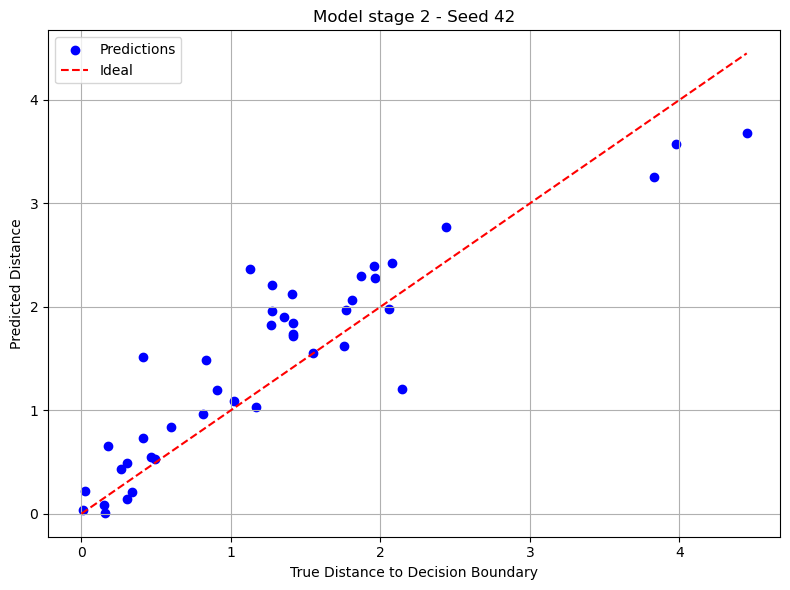

In [42]:
evaluate_distance_prediction(folder_path="../results", file_prefix="extension_results_DS6_1_1_seed", synthetic_data=X_test, 
                             model_stage=2, num_rdc_samples=10_000, seed_plot_index=42)


--- Final Distance Prediction Evaluation ---
Model Stage: 2
Mean MAE : 0.3329 ± 0.0196
Mean RMSE: 0.4337 ± 0.0185


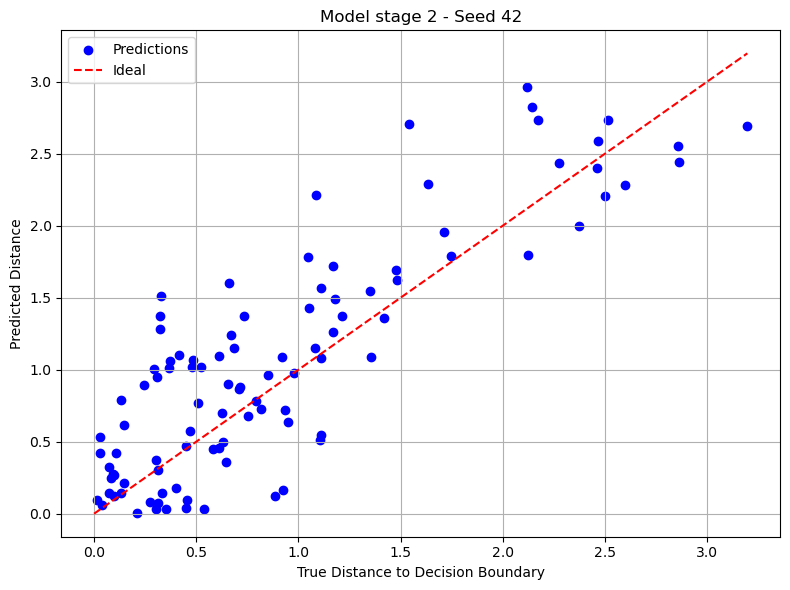

In [43]:
evaluate_distance_prediction(folder_path="../results", file_prefix="extension_results_DS6_1_1_seed", synthetic_data=Syn_test, 
                             model_stage=2, num_rdc_samples=10_000, seed_plot_index=42)


--- Final Distance Prediction Evaluation ---
Model Stage: 2
Mean MAE : 0.3226 ± 0.0330
Mean RMSE: 0.4379 ± 0.0483


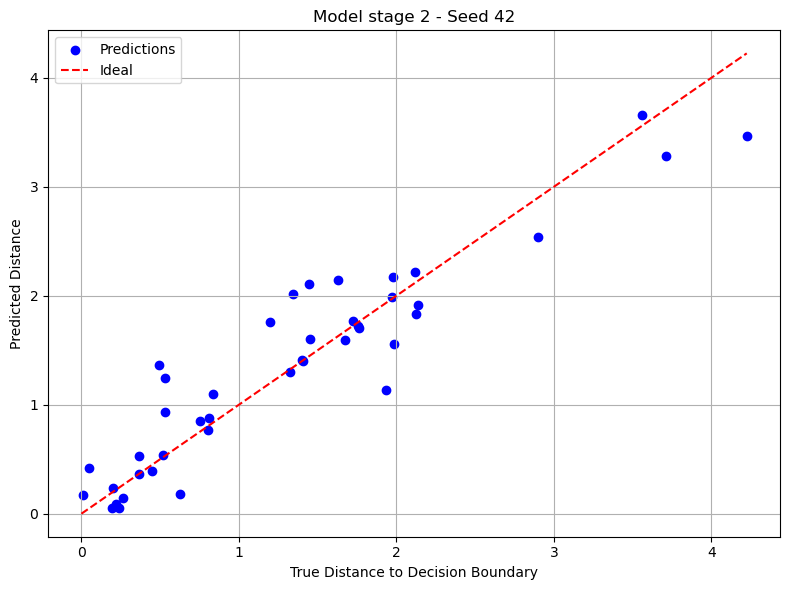

In [44]:
evaluate_distance_prediction(folder_path="../results", file_prefix="extension_results_DS6_1_2_seed", synthetic_data=X_test, 
                             model_stage=2, num_rdc_samples=10_000, seed_plot_index=42)


--- Final Distance Prediction Evaluation ---
Model Stage: 2
Mean MAE : 0.3174 ± 0.0226
Mean RMSE: 0.4200 ± 0.0322


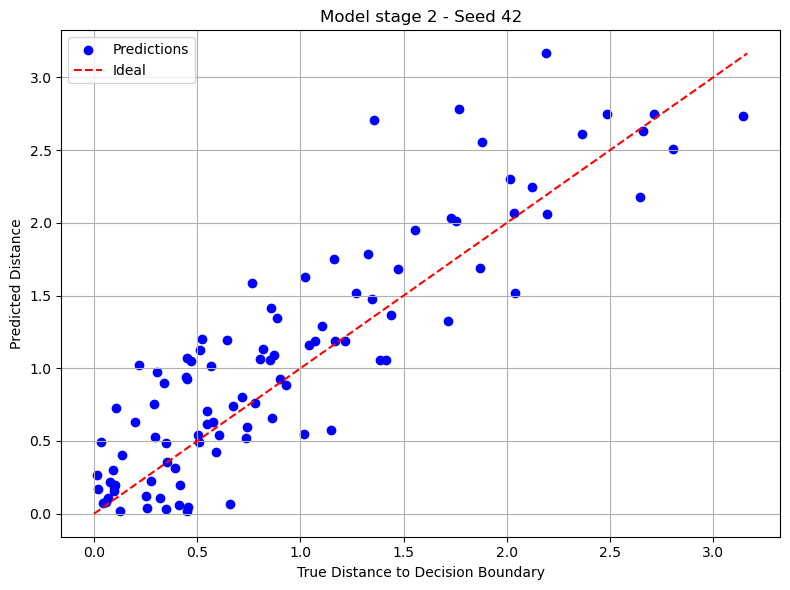

In [45]:
evaluate_distance_prediction(folder_path="../results", file_prefix="extension_results_DS6_1_2_seed", synthetic_data=Syn_test, 
                             model_stage=2, num_rdc_samples=10_000, seed_plot_index=42)


--- Final Distance Prediction Evaluation ---
Model Stage: 2
Mean MAE : 0.4109 ± 0.0444
Mean RMSE: 0.5915 ± 0.0656


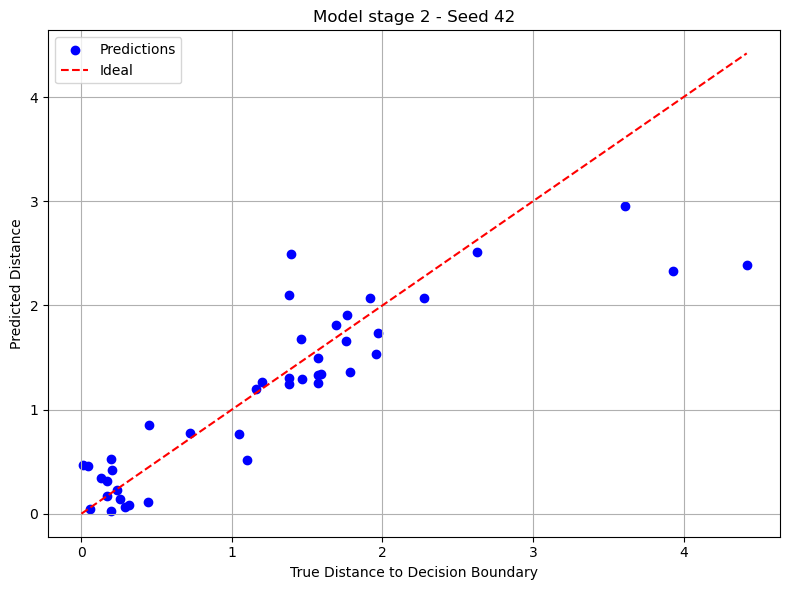

In [46]:
evaluate_distance_prediction(folder_path="../results", file_prefix="extension_results_DS6_1_3_seed", synthetic_data=X_test, 
                             model_stage=2, num_rdc_samples=10_000, seed_plot_index=42)


--- Final Distance Prediction Evaluation ---
Model Stage: 2
Mean MAE : 0.3336 ± 0.0270
Mean RMSE: 0.4418 ± 0.0401


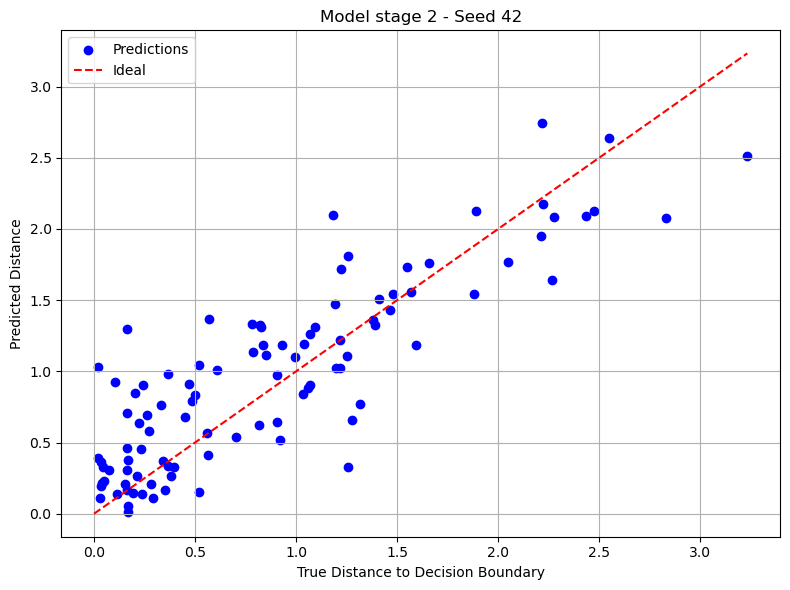

In [47]:
evaluate_distance_prediction(folder_path="../results", file_prefix="extension_results_DS6_1_3_seed", synthetic_data=Syn_test, 
                             model_stage=2, num_rdc_samples=10_000, seed_plot_index=42)

### Black box 2: Gradient Boosting classifier


--- Final Distance Prediction Evaluation ---
Model Stage: 2
Mean MAE : 0.3227 ± 0.0267
Mean RMSE: 0.4198 ± 0.0363


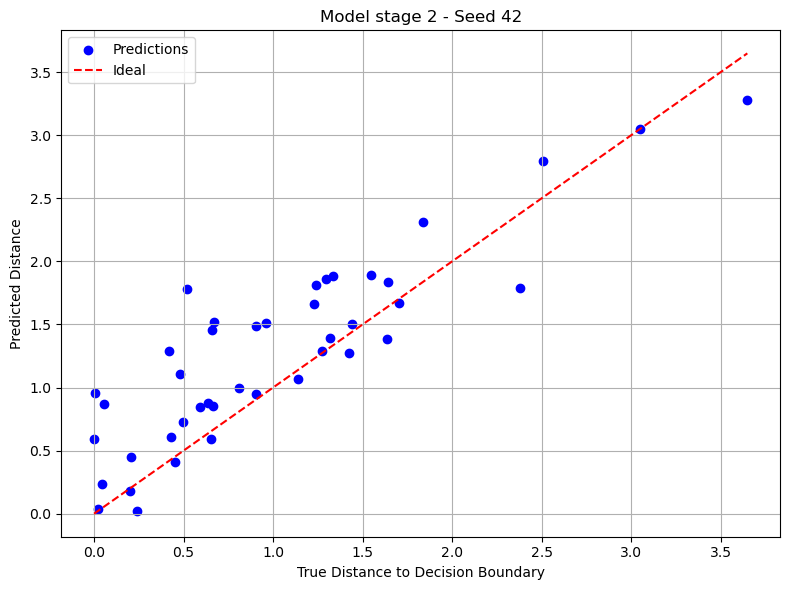

In [48]:
evaluate_distance_prediction(folder_path="../results", file_prefix="extension_results_DS6_2_1_seed", synthetic_data=X_test, 
                             model_stage=2, num_rdc_samples=10_000, seed_plot_index=42)


--- Final Distance Prediction Evaluation ---
Model Stage: 2
Mean MAE : 0.3332 ± 0.0095
Mean RMSE: 0.4160 ± 0.0113


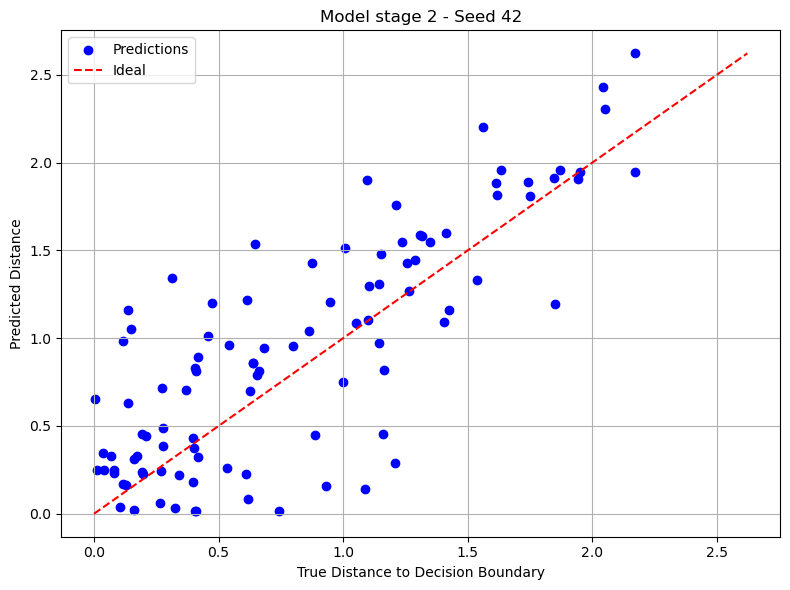

In [49]:
evaluate_distance_prediction(folder_path="../results", file_prefix="extension_results_DS6_2_1_seed", synthetic_data=Syn_test, 
                             model_stage=2, num_rdc_samples=10_000, seed_plot_index=42)


--- Final Distance Prediction Evaluation ---
Model Stage: 2
Mean MAE : 0.2905 ± 0.0224
Mean RMSE: 0.3881 ± 0.0366


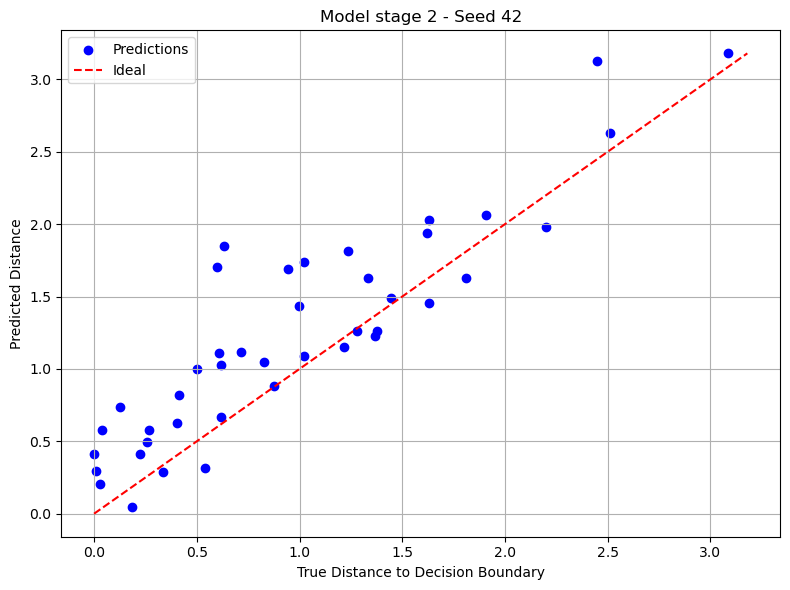

In [50]:
evaluate_distance_prediction(folder_path="../results", file_prefix="extension_results_DS6_2_2_seed", synthetic_data=X_test, 
                             model_stage=2, num_rdc_samples=10_000, seed_plot_index=42)


--- Final Distance Prediction Evaluation ---
Model Stage: 2
Mean MAE : 0.3233 ± 0.0165
Mean RMSE: 0.4132 ± 0.0273


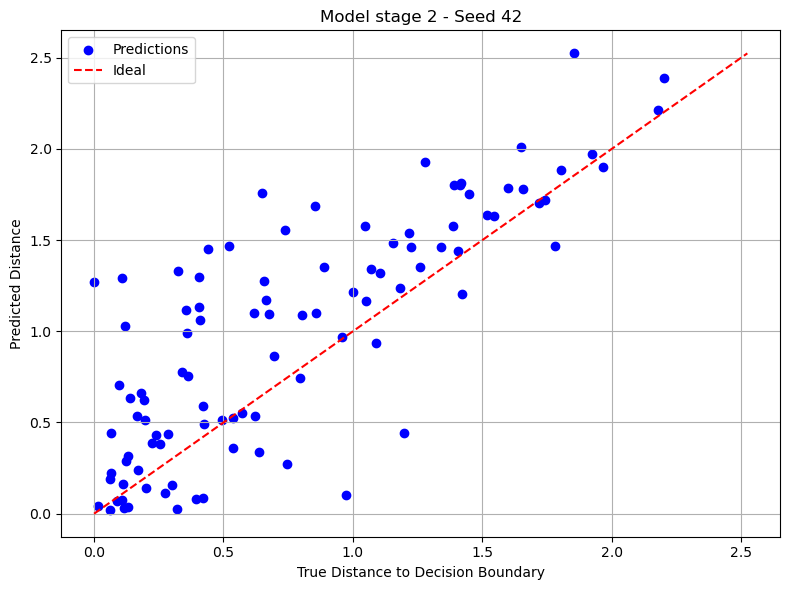

In [51]:
evaluate_distance_prediction(folder_path="../results", file_prefix="extension_results_DS6_2_2_seed", synthetic_data=Syn_test, 
                             model_stage=2, num_rdc_samples=10_000, seed_plot_index=42)


--- Final Distance Prediction Evaluation ---
Model Stage: 2
Mean MAE : 0.3046 ± 0.0218
Mean RMSE: 0.4074 ± 0.0218


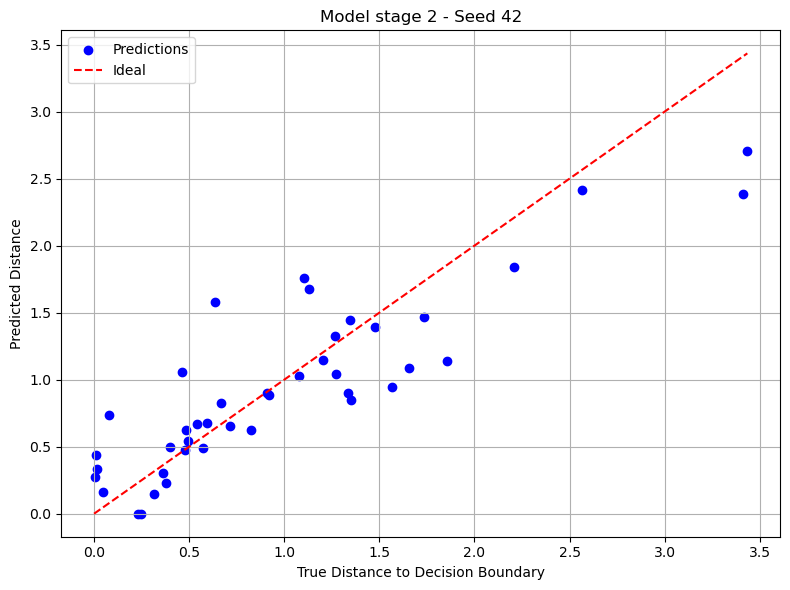

In [52]:
evaluate_distance_prediction(folder_path="../results", file_prefix="extension_results_DS6_2_3_seed", synthetic_data=X_test, 
                             model_stage=2, num_rdc_samples=10_000, seed_plot_index=42)


--- Final Distance Prediction Evaluation ---
Model Stage: 2
Mean MAE : 0.3161 ± 0.0154
Mean RMSE: 0.4036 ± 0.0173


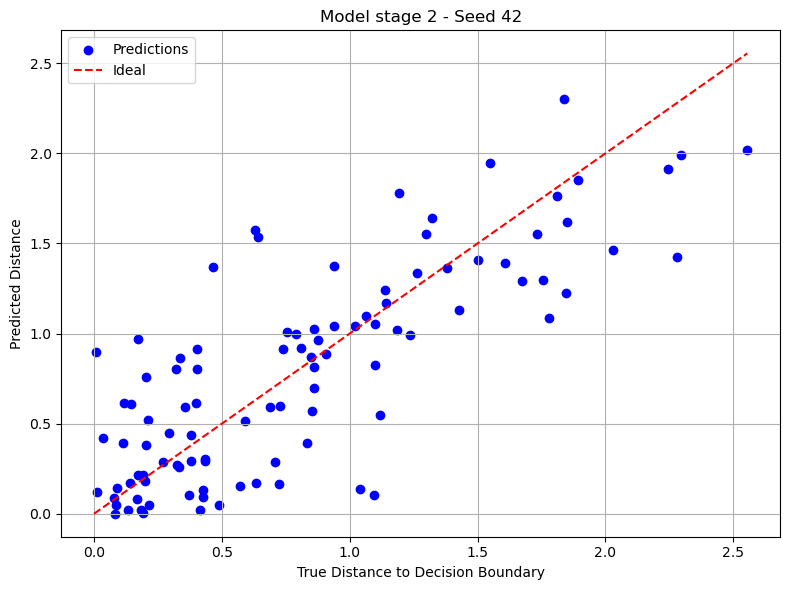

In [53]:
evaluate_distance_prediction(folder_path="../results", file_prefix="extension_results_DS6_2_3_seed", synthetic_data=Syn_test, 
                             model_stage=2, num_rdc_samples=10_000, seed_plot_index=42)

### Black box 3: Neural Network classifier


--- Final Distance Prediction Evaluation ---
Model Stage: 2
Mean MAE : 0.3650 ± 0.0503
Mean RMSE: 0.5240 ± 0.0789


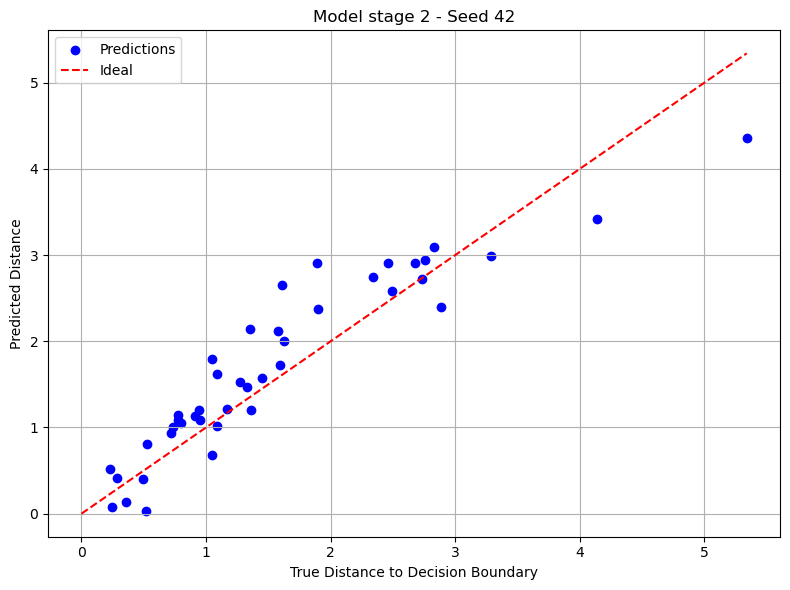

In [54]:
evaluate_distance_prediction(folder_path="../results", file_prefix="extension_results_DS6_3_1_seed", synthetic_data=X_test, 
                             model_stage=2, num_rdc_samples=10_000, seed_plot_index=42)


--- Final Distance Prediction Evaluation ---
Model Stage: 2
Mean MAE : 0.3207 ± 0.0298
Mean RMSE: 0.4669 ± 0.1172


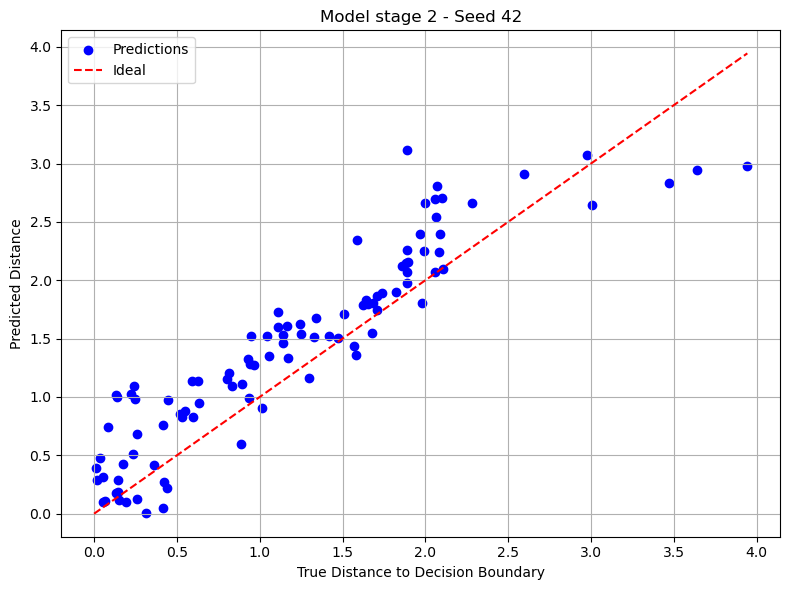

In [55]:
evaluate_distance_prediction(folder_path="../results", file_prefix="extension_results_DS6_3_1_seed", synthetic_data=Syn_test, 
                             model_stage=2, num_rdc_samples=10_000, seed_plot_index=42)


--- Final Distance Prediction Evaluation ---
Model Stage: 2
Mean MAE : 0.3545 ± 0.0273
Mean RMSE: 0.5530 ± 0.1031


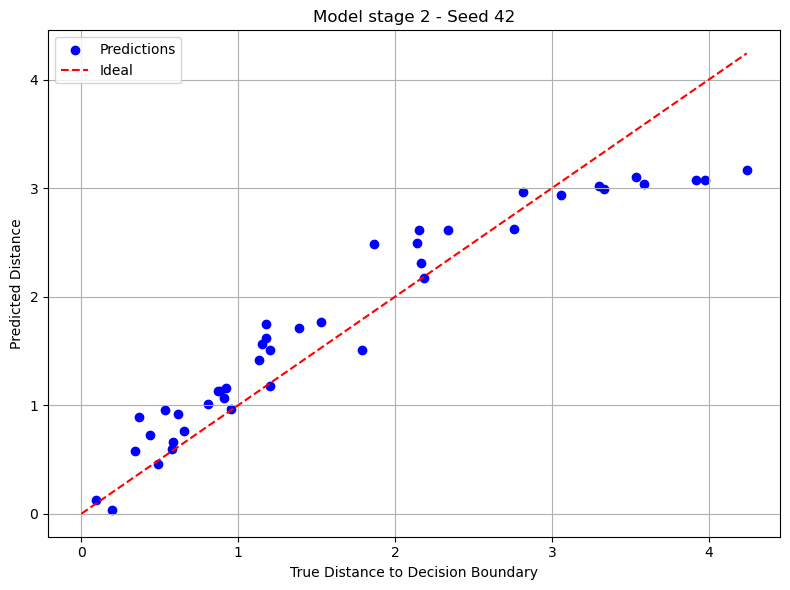

In [56]:
evaluate_distance_prediction(folder_path="../results", file_prefix="extension_results_DS6_3_2_seed", synthetic_data=X_test, 
                             model_stage=2, num_rdc_samples=10_000, seed_plot_index=42)


--- Final Distance Prediction Evaluation ---
Model Stage: 2
Mean MAE : 0.2630 ± 0.0122
Mean RMSE: 0.3330 ± 0.0118


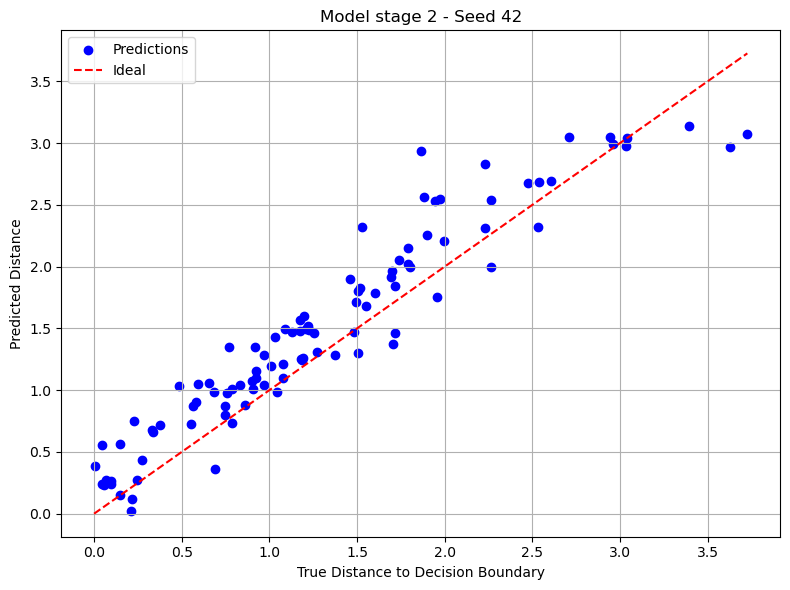

In [57]:
evaluate_distance_prediction(folder_path="../results", file_prefix="extension_results_DS6_3_2_seed", synthetic_data=Syn_test, 
                             model_stage=2, num_rdc_samples=10_000, seed_plot_index=42)


--- Final Distance Prediction Evaluation ---
Model Stage: 2
Mean MAE : 0.3326 ± 0.0257
Mean RMSE: 0.5394 ± 0.0791


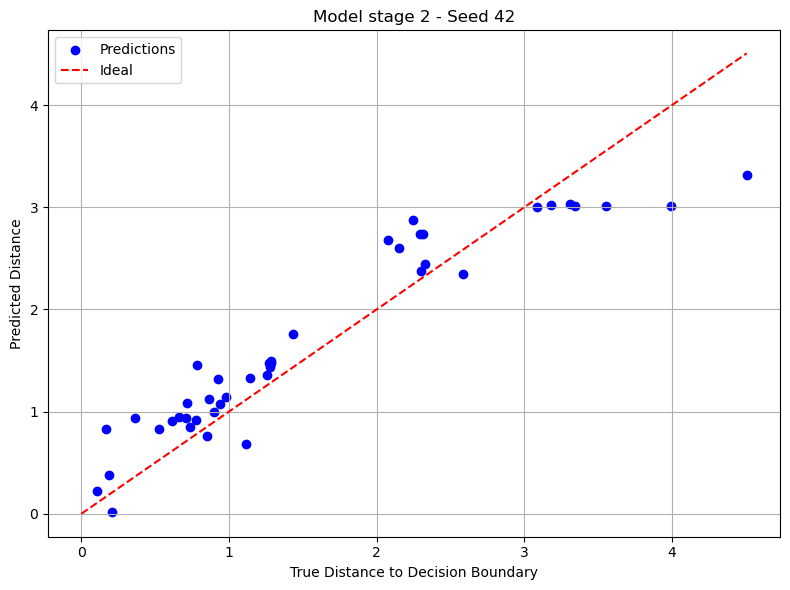

In [58]:
evaluate_distance_prediction(folder_path="../results", file_prefix="extension_results_DS6_3_3_seed", synthetic_data=X_test, 
                             model_stage=2, num_rdc_samples=10_000, seed_plot_index=42)


--- Final Distance Prediction Evaluation ---
Model Stage: 2
Mean MAE : 0.3070 ± 0.0295
Mean RMSE: 0.4117 ± 0.0718


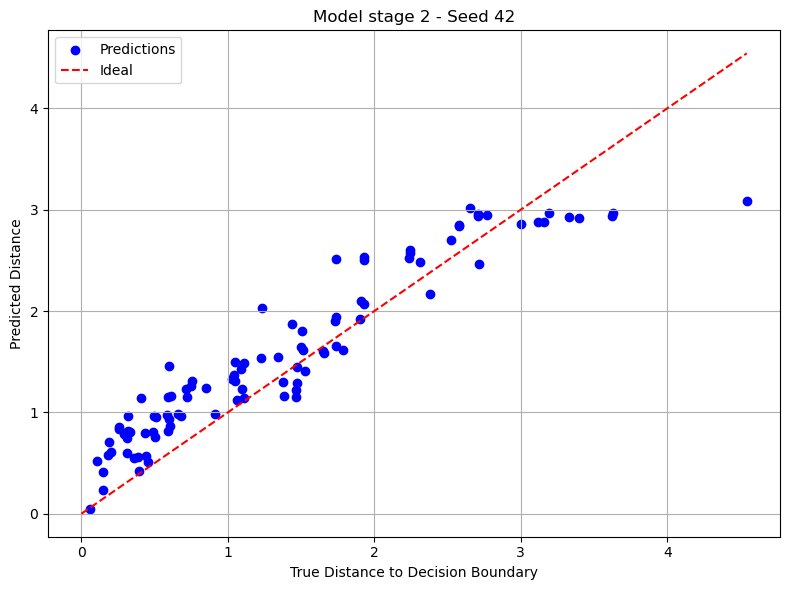

In [59]:
evaluate_distance_prediction(folder_path="../results", file_prefix="extension_results_DS6_3_3_seed", synthetic_data=Syn_test, 
                             model_stage=2, num_rdc_samples=10_000, seed_plot_index=42)